In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### 1.Load the dataset and explore the variables.

In [3]:
customer_churn=pd.read_csv('customer_churn.csv')
display(customer_churn.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
customer_churn['Churn'].value_counts(dropna=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

In [5]:
#making all column headers lower and removing spaces
cols = []
for col in customer_churn.columns:
  cols.append(col.lower().replace(' ', '_'))
customer_churn.columns = cols

### 2.We will try to predict variable Churn using a logistic regression on variables tenure, SeniorCitizen,MonthlyCharges.

In [6]:
display(customer_churn.head())

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
customer_churn.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

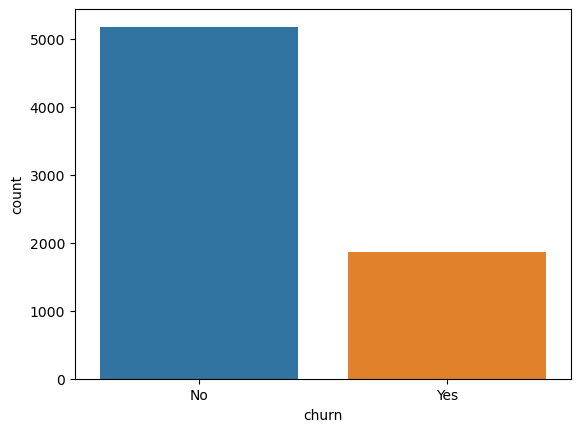

In [8]:
sns.countplot(x='churn', data=customer_churn);
plt.show()

In [9]:
customer_churn.isna().sum() # checking missing values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [10]:
prediction = customer_churn[['tenure', 'seniorcitizen', 'monthlycharges','churn']] 

In [11]:
prediction

,tenure,seniorcitizen,monthlycharges,churn
0,1,0,29.85,No
1,34,0,56.95,No
2,2,0,53.85,Yes
3,45,0,42.30,No
4,2,0,70.70,Yes
...,...,...,...,...
7038,24,0,84.80,No
7039,72,0,103.20,No
7040,11,0,29.60,No
7041,4,1,74.40,Yes


In [12]:
# X/y split
X = prediction.drop('churn',axis = 1)
y = prediction['churn']

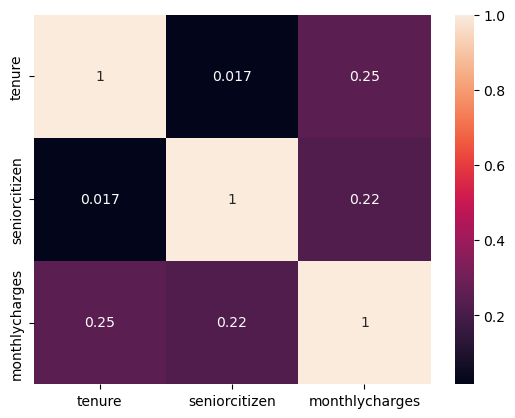

In [13]:
correlations_matrix = X.corr()
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [14]:
# there is no colinerity

### 4. Extract the independent variables and scale them
here we start scaling, so need to do train-test-split before

In [15]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [16]:
# all features are numeric, so no need to split into _num and _cat. Transformer = scaler
transformer = StandardScaler() 
transformer.fit(X_train) 

StandardScaler()

In [17]:
X_train_scaled_np = transformer.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
# because this is the only tranformation we apply to the numerics, (there are no categorical features in the df)
# we can immediately transform the X_test as well
X_test_scaled_np = transformer.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled_np , columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,tenure,seniorcitizen,monthlycharges
3296,-0.340191,-0.435476,-0.514314
6397,0.883210,2.296336,0.017840
6043,-1.196572,-0.435476,-0.819594
5309,1.168670,-0.435476,-1.483535
3000,-0.829552,-0.435476,0.658427


In [18]:
y_train.head()

3296     No
6397     No
6043    Yes
5309     No
3000    Yes
Name: churn, dtype: object

### 5. Build the logistic regression model.

In [19]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0)

In [20]:
lr.predict(X_train_scaled)

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [21]:
lr.predict_proba(X_train_scaled)

array([[0.83055757, 0.16944243],
       [0.88959148, 0.11040852],
       [0.66558189, 0.33441811],
       ...,
       [0.98794797, 0.01205203],
       [0.25884511, 0.74115489],
       [0.79626532, 0.20373468]])

In [22]:
lr.predict_proba(X_train_scaled)[0,0] + lr.predict_proba(X_train_scaled)[0,1]

1.0

In [23]:
lr.predict_proba(X_train_scaled).shape

(5282, 2)

In [24]:
logits = np.log(lr.predict_proba(X_train_scaled)[:,1]/(1-lr.predict_proba(X_train_scaled)[:,1]))

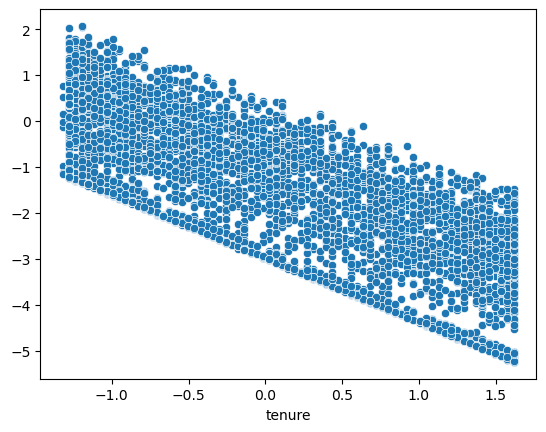

In [25]:
sns.scatterplot(y = logits,x = X_train_scaled['tenure']);
plt.show()

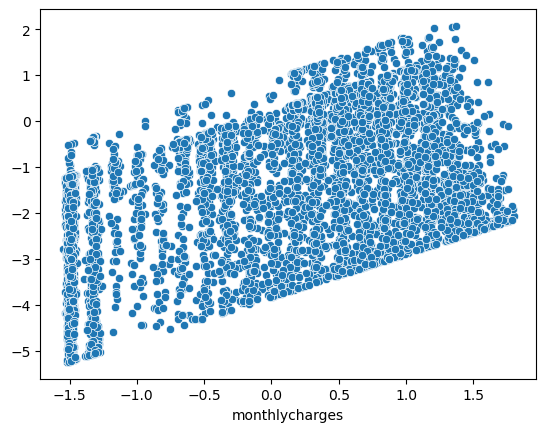

In [26]:
sns.scatterplot(y = logits,x = X_train_scaled['monthlycharges']);
plt.show()

#### Imbalance and metrics

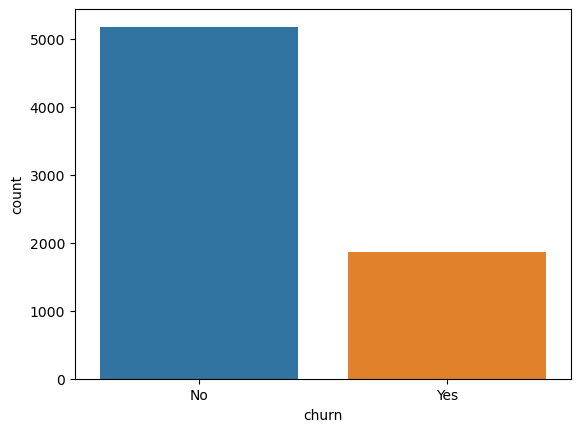

In [27]:
sns.countplot(x = 'churn', data = customer_churn);
plt.show()

In [28]:
count_classes = customer_churn['churn'].value_counts()
print("The class imbalance ratio is: {:.2f}".format((count_classes[0]-count_classes[1])/(count_classes[0]+count_classes[1])))

The class imbalance ratio is: 0.47


we have above class imbalance

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0, solver='lbfgs')
lr.fit(X_train_scaled, y_train)
print("The accuracy of the model in the TEST set is: {:.2f}".format(lr.score(X_test_scaled, y_test)))

The accuracy of the model in the TEST set is: 0.78


In [30]:
y_test

2200    No
4627    No
3225    No
2828    No
3768    No
        ..
3184    No
2551    No
5735    No
5096    No
450     No
Name: churn, Length: 1761, dtype: object

In [31]:
#while accuracy is not absolutely terrible, a closer look reveals some low scores in certain methods
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score

y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.78
The Kappa in the TEST set is: 0.38


### 8. Apply imblearn.over_sampling.SMOTE to the dataset.

In [32]:
from imblearn.over_sampling import SMOTE

In [33]:
sm = SMOTE(random_state=100,k_neighbors=3)

X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled,y_train)

In [34]:
print(X_train.shape)
print(X_train_SMOTE.shape)

(5282, 3)
(7752, 3)


In [35]:
y_train_SMOTE.value_counts()

No     3876
Yes    3876
Name: churn, dtype: int64

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_test = lr.predict(X_test_scaled)

print("The accuracy in the TEST set is: {:.2f}".format(accuracy_score(y_test,y_pred_test)))
print("The Kappa in the TEST set is: {:.2f}".format(cohen_kappa_score(y_test,y_pred_test)))

The accuracy in the TEST set is: 0.72
The Kappa in the TEST set is: 0.38


#### To be honest I do not see any impovemens, all scores stayed the same